In [2]:
library(forecast)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.3 



# Load data 

In [3]:
cpi <- read.csv('Inflation_France_OECD.csv',sep=';')

In [4]:
head(cpi)

Time,CPI
Jan-00,1.5
Feb-00,1.4
Mar-00,1.5
Apr-00,1.2
May-00,1.4
Jun-00,1.7


#### Question 1


Transform to time series

In [5]:
cpi_ts <- ts(cpi$CPI,start = c(2000,1),frequency = 12)

Standard statistics for CPI

In [6]:
summary(cpi_ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.700   0.900   1.600   1.441   2.000   3.600 

Plot of the entire time series

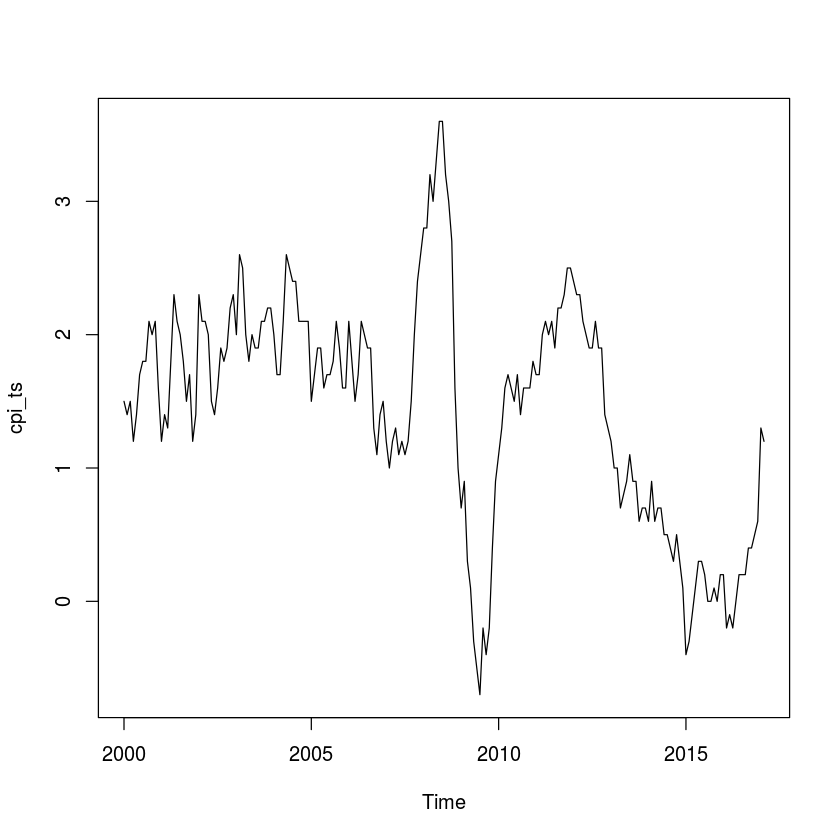

In [7]:
plot(cpi_ts)

ACF 

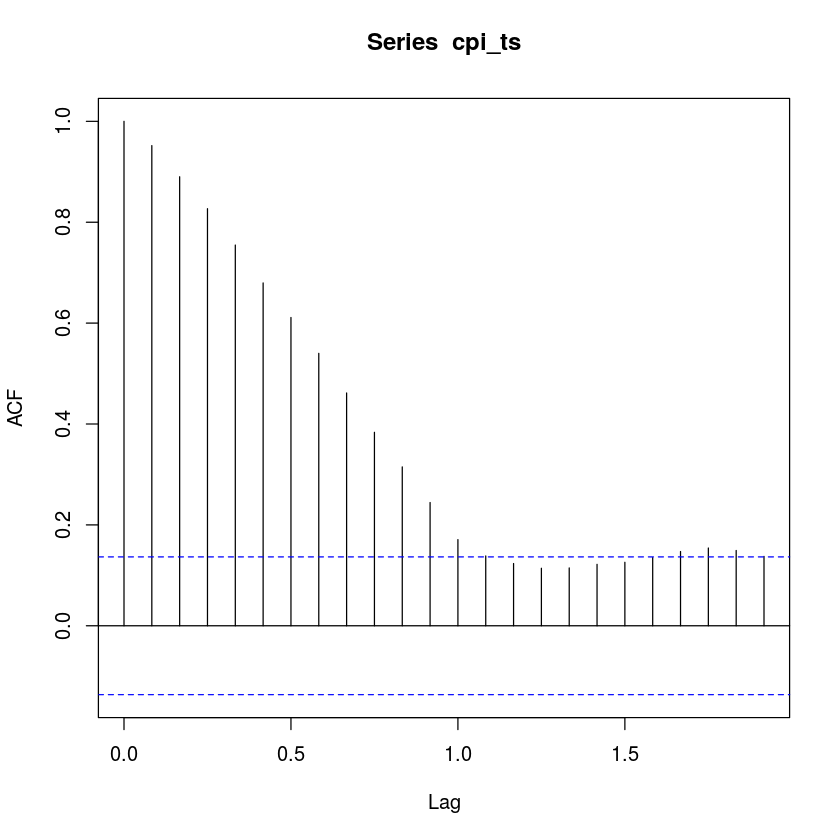

In [8]:
acf(cpi_ts)

PACF

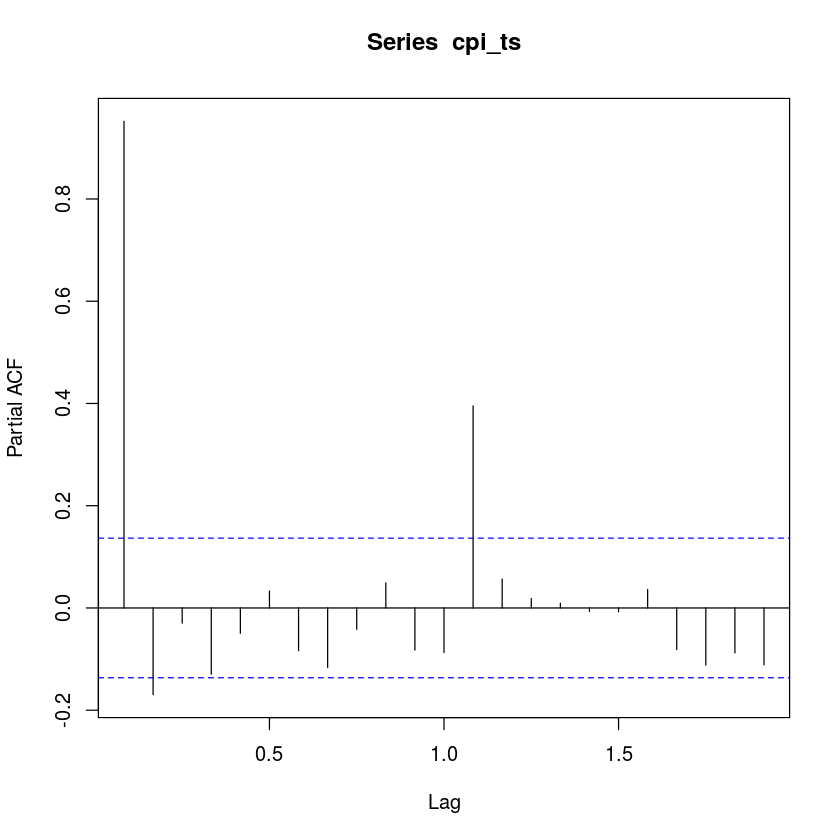

In [9]:
pacf(cpi_ts)

CPI seems to have a global decreasing trend. The ACF plot has the characteristics of an AR process, and it is confirmed by the partial ACF.

#### Question 2

Split data into training and testing sets 

In [10]:
train <- ts(cpi_ts[1:103],start = c(2000,1),frequency = 12)

In [11]:
test <- cpi_ts[104:206]

Model with an AR(1)

In [13]:
model <- arima(train,order = c(1,0,0))

In [14]:
model


Call:
arima(x = train, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.8897     1.9851
s.e.  0.0516     0.2289

sigma^2 estimated as 0.07369:  log likelihood = -12.63,  aic = 31.25

#### Question 3 

In [32]:
# Store estimated parameters 
slope = c()
intercept = c()
fcast = c()

for (i in c(0:103))
{
    # set train data 
    tr <- ts(cpi_ts[1:(103+i)],start = c(2000,1),frequency = 12)
    # train model 
    ar1 <- arima(tr,order=c(1,0,0))
    # record slope, intercept, horizon 1 to 6 forecasts
    slope = c(slope,as.numeric(ar1$coef[1]))
    intercept = c(intercept,as.numeric(ar1$coef[2]))
    fcast = rbind(fcast,as.data.frame(forecast(ar1,h=6))[,1])
}

Break in slope parameter

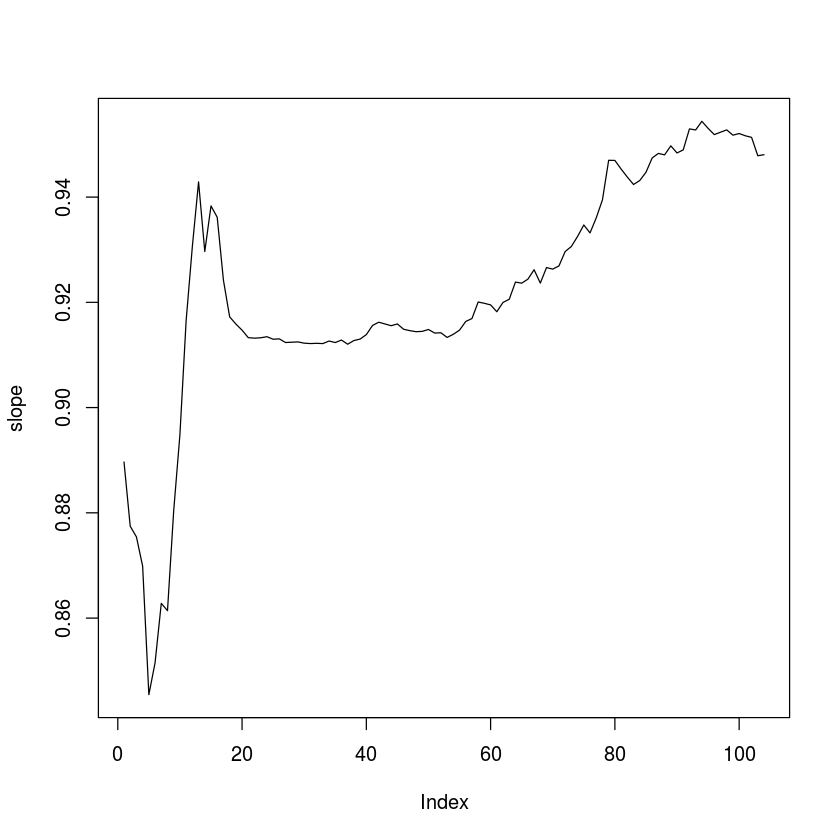

In [39]:
plot(slope,type='l')

Remark : There is a break when using a few additional points to the 50 % first observations. And then, the slope is increasing slowly until all the data are used as training data.

Break for intercept parameter

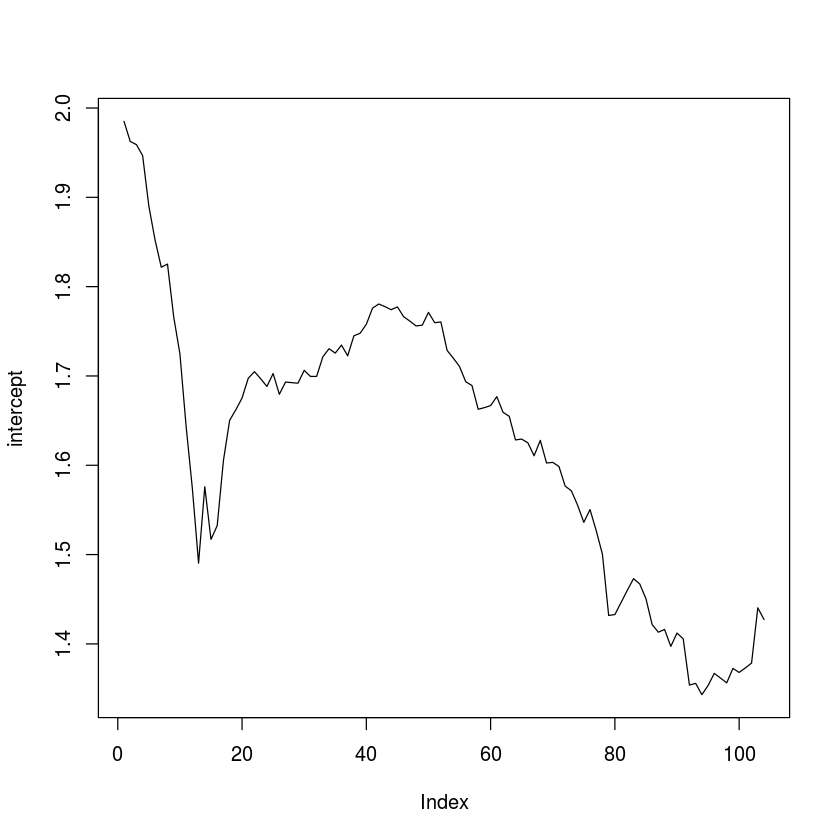

In [40]:
plot(intercept, type='l')

 Remark : There is also a break when using a few additional points to the 50 % first observations. And then, the intercept is decreasing slowly until all the data are used as training data.

#### Question 4 

Set true values for horizon 1 to horizon 6

In [44]:
true_val = c()
for (i in c(1:98))
{

    true_val = rbind(true_val,cpi_ts[(103+i):(108+i)])
}

Compute MFE

In [66]:
MFE = apply(true_val-fcast[1:98,],2,mean)
MFE = as.data.frame(MFE)
rownames(MFE) <- c('Horizon1','Horizon2','Horizon3','Horizon4','Horizon5','Horizon6')

In [67]:
MFE

,MFE
Horizon1,-0.07137255
Horizon2,-0.13601743
Horizon3,-0.19515782
Horizon4,-0.24795790
Horizon5,-0.28030031
Horizon6,-0.30560418


Compute RMFE

In [70]:
RMFE = apply((true_val-fcast[1:98,])**2,2,mean)
RMFE = as.data.frame(RMFE)
rownames(RMFE) <- c('Horizon1','Horizon2','Horizon3','Horizon4','Horizon5','Horizon6')

In [71]:
RMFE

,RMFE
Horizon1,0.06567285
Horizon2,0.16207332
Horizon3,0.28540392
Horizon4,0.41755091
Horizon5,0.54006295
Horizon6,0.63980965


So, we can see that as the horizon increases, the forecast error increases too.